In [1]:
import pandas as pd 
from pathlib import Path

df = pd.read_csv(Path("../Artifacts/train.csv"))

In [2]:
df.info

<bound method DataFrame.info of           Price               Close                High                Low  \
0        Ticker                GC=F                GC=F               GC=F   
1          Date                 NaN                 NaN                NaN   
2    2021-01-04   1944.699951171875  1945.0999755859375  1912.199951171875   
3    2021-01-05   1952.699951171875   1952.699951171875  1941.300048828125   
4    2021-01-06  1906.9000244140625  1959.9000244140625             1901.5   
..          ...                 ...                 ...                ...   
750  2023-12-22    2057.10009765625   2068.699951171875  2052.199951171875   
751  2023-12-26   2058.199951171875   2060.800048828125  2054.199951171875   
752  2023-12-27    2081.89990234375    2081.89990234375  2064.800048828125   
753  2023-12-28    2073.89990234375   2087.300048828125             2066.5   
754  2023-12-29    2062.39990234375    2068.89990234375   2062.10009765625   

                  Open Volume  

In [3]:
df_dropped = df.iloc[2:].reset_index(drop=True)

In [4]:
df_dropped

,Price,Close,High,Low,Open,Volume
0,2021-01-04,1944.699951171875,1945.0999755859375,1912.199951171875,1912.199951171875,154
1,2021-01-05,1952.699951171875,1952.699951171875,1941.300048828125,1941.699951171875,113
2,2021-01-06,1906.9000244140625,1959.9000244140625,1901.5,1952.0,331
3,2021-01-07,1912.300048828125,1926.699951171875,1912.0,1922.5999755859375,122
4,2021-01-08,1834.0999755859375,1908.0,1834.0999755859375,1908.0,60
...,...,...,...,...,...,...
748,2023-12-22,2057.10009765625,2068.699951171875,2052.199951171875,2055.699951171875,202
749,2023-12-26,2058.199951171875,2060.800048828125,2054.199951171875,2060.0,64
750,2023-12-27,2081.89990234375,2081.89990234375,2064.800048828125,2067.300048828125,586
751,2023-12-28,2073.89990234375,2087.300048828125,2066.5,2081.60009765625,338


In [5]:
df = df_dropped.copy()
df.Price

0      2021-01-04
1      2021-01-05
2      2021-01-06
3      2021-01-07
4      2021-01-08
          ...    
748    2023-12-22
749    2023-12-26
750    2023-12-27
751    2023-12-28
752    2023-12-29
Name: Price, Length: 753, dtype: object

In [6]:
df.rename(columns={"Price" : "Date"}, inplace=True)
        

In [7]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [8]:
df

,Date,Close,High,Low,Open,Volume
0,2021-01-04,1944.699951171875,1945.0999755859375,1912.199951171875,1912.199951171875,154
1,2021-01-05,1952.699951171875,1952.699951171875,1941.300048828125,1941.699951171875,113
2,2021-01-06,1906.9000244140625,1959.9000244140625,1901.5,1952.0,331
3,2021-01-07,1912.300048828125,1926.699951171875,1912.0,1922.5999755859375,122
4,2021-01-08,1834.0999755859375,1908.0,1834.0999755859375,1908.0,60
...,...,...,...,...,...,...
748,2023-12-22,2057.10009765625,2068.699951171875,2052.199951171875,2055.699951171875,202
749,2023-12-26,2058.199951171875,2060.800048828125,2054.199951171875,2060.0,64
750,2023-12-27,2081.89990234375,2081.89990234375,2064.800048828125,2067.300048828125,586
751,2023-12-28,2073.89990234375,2087.300048828125,2066.5,2081.60009765625,338


In [9]:
import yfinance as yf 



ticker = "GC=F"
data = yf.download(tickers=ticker, start="2021-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [10]:
data

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2021-01-04,1944.699951,1945.099976,1912.199951,1912.199951,154
2021-01-05,1952.699951,1952.699951,1941.300049,1941.699951,113
2021-01-06,1906.900024,1959.900024,1901.500000,1952.000000,331
2021-01-07,1912.300049,1926.699951,1912.000000,1922.599976,122
2021-01-08,1834.099976,1908.000000,1834.099976,1908.000000,60
...,...,...,...,...,...
2022-12-23,1795.900024,1802.800049,1794.099976,1794.300049,49
2022-12-27,1814.800049,1826.300049,1803.400024,1803.400024,69


In [11]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [12]:
# row wise mean and median and  modes 
def generate_features(df: pd.DataFrame):
    y = df.Close 
    features = ["Date", 'High', 'Low', 'Open', 'Volume']
    X = df[features]
    # aggregations 


    # lag and time features 


    return df     

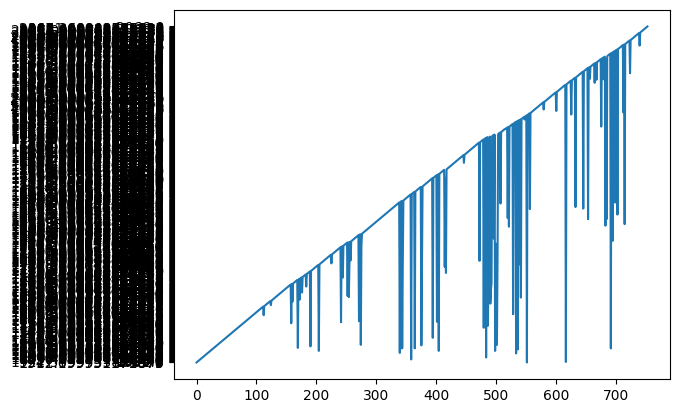

In [13]:
import matplotlib.pyplot as plt 



plt.plot(df.Open)
plt.show()

In [14]:
df

,Date,Close,High,Low,Open,Volume
0,2021-01-04,1944.699951171875,1945.0999755859375,1912.199951171875,1912.199951171875,154
1,2021-01-05,1952.699951171875,1952.699951171875,1941.300048828125,1941.699951171875,113
2,2021-01-06,1906.9000244140625,1959.9000244140625,1901.5,1952.0,331
3,2021-01-07,1912.300048828125,1926.699951171875,1912.0,1922.5999755859375,122
4,2021-01-08,1834.0999755859375,1908.0,1834.0999755859375,1908.0,60
...,...,...,...,...,...,...
748,2023-12-22,2057.10009765625,2068.699951171875,2052.199951171875,2055.699951171875,202
749,2023-12-26,2058.199951171875,2060.800048828125,2054.199951171875,2060.0,64
750,2023-12-27,2081.89990234375,2081.89990234375,2064.800048828125,2067.300048828125,586
751,2023-12-28,2073.89990234375,2087.300048828125,2066.5,2081.60009765625,338


In [16]:
df.round(2)

,Date,Close,High,Low,Open,Volume
0,2021-01-04,1944.699951171875,1945.0999755859375,1912.199951171875,1912.199951171875,154
1,2021-01-05,1952.699951171875,1952.699951171875,1941.300048828125,1941.699951171875,113
2,2021-01-06,1906.9000244140625,1959.9000244140625,1901.5,1952.0,331
3,2021-01-07,1912.300048828125,1926.699951171875,1912.0,1922.5999755859375,122
4,2021-01-08,1834.0999755859375,1908.0,1834.0999755859375,1908.0,60
...,...,...,...,...,...,...
748,2023-12-22,2057.10009765625,2068.699951171875,2052.199951171875,2055.699951171875,202
749,2023-12-26,2058.199951171875,2060.800048828125,2054.199951171875,2060.0,64
750,2023-12-27,2081.89990234375,2081.89990234375,2064.800048828125,2067.300048828125,586
751,2023-12-28,2073.89990234375,2087.300048828125,2066.5,2081.60009765625,338


In [17]:
df.Close.round(2)

TypeError: can't multiply sequence by non-int of type 'float'

In [21]:
df.Close

TypeError: can't multiply sequence by non-int of type 'float'

In [23]:
df.round(1)

,Date,Close,High,Low,Open,Volume
0,2021-01-04,1944.699951171875,1945.0999755859375,1912.199951171875,1912.199951171875,154
1,2021-01-05,1952.699951171875,1952.699951171875,1941.300048828125,1941.699951171875,113
2,2021-01-06,1906.9000244140625,1959.9000244140625,1901.5,1952.0,331
3,2021-01-07,1912.300048828125,1926.699951171875,1912.0,1922.5999755859375,122
4,2021-01-08,1834.0999755859375,1908.0,1834.0999755859375,1908.0,60
...,...,...,...,...,...,...
748,2023-12-22,2057.10009765625,2068.699951171875,2052.199951171875,2055.699951171875,202
749,2023-12-26,2058.199951171875,2060.800048828125,2054.199951171875,2060.0,64
750,2023-12-27,2081.89990234375,2081.89990234375,2064.800048828125,2067.300048828125,586
751,2023-12-28,2073.89990234375,2087.300048828125,2066.5,2081.60009765625,338


In [24]:
df.dtypes

Date      object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object

In [25]:
df = df.apply(pd.to_numeric, errors='coerce')
df

,Date,Close,High,Low,Open,Volume
0,NaN,1944.699951,1945.099976,1912.199951,1912.199951,154
1,NaN,1952.699951,1952.699951,1941.300049,1941.699951,113
2,NaN,1906.900024,1959.900024,1901.500000,1952.000000,331
3,NaN,1912.300049,1926.699951,1912.000000,1922.599976,122
4,NaN,1834.099976,1908.000000,1834.099976,1908.000000,60
...,...,...,...,...,...,...
748,NaN,2057.100098,2068.699951,2052.199951,2055.699951,202
749,NaN,2058.199951,2060.800049,2054.199951,2060.000000,64
750,NaN,2081.899902,2081.899902,2064.800049,2067.300049,586
751,NaN,2073.899902,2087.300049,2066.500000,2081.600098,338


/tmp/ipykernel_5983/3148777777.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


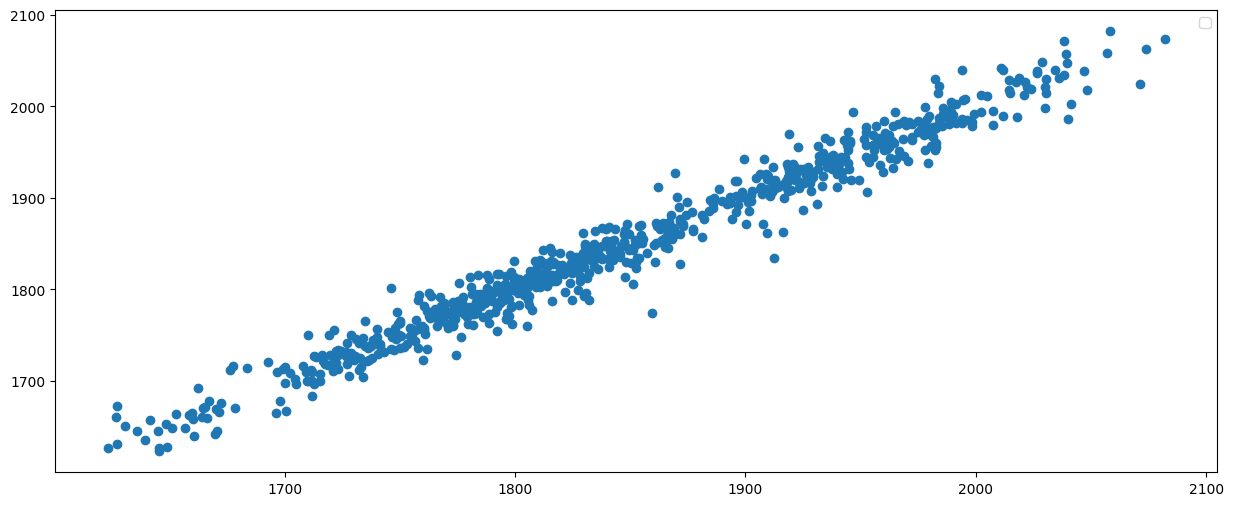

In [33]:
plt.figure(figsize=(15, 6))
plt.scatter(df.Close.shift(1), df.Close)
plt.legend()
plt.show()

In [34]:
df.Close.shift(1)

0              NaN
1      1944.699951
2      1952.699951
3      1906.900024
4      1912.300049
          ...     
748    2039.099976
749    2057.100098
750    2058.199951
751    2081.899902
752    2073.899902
Name: Close, Length: 753, dtype: float64

In [ ]:
# lag plots 

from matplotlib.offsetbox import AnchoredText
import seaborn as sns 
import math 
from statsmodels.graphics.tsaplots import plot_pacf




def plot_lag(x, lag=1, ax=None, **kwargs):
    x_ = x.shift(lag)
    y_ = x 

    if ax is None: 
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75, 
        s=3, 
    )

    line = dict(color="C3")
    ax = sns.regplot(
        x=x_, 
        y=y_,
        scatter_kws=scatter_kws, 
        line_kws=line, 
        ax=ax, 
        **kwargs
    )

    at = AnchoredText(
        f"{y_.corr(x_):.2f}", 
        prop = dict(size="large"), 
        frameon = True, 
        loc = "upper left"
    )